# 標準誤差

標準誤差はある母集団の統計量の代替として、標本データから得られた推定値がどのぐらい真の値に近いかを示します。

通常「標本データから得られた平均値」について、その平均値が真の平均値に対してどのぐらいバラつきがあるかを示し、バラつきが小さいほど「信頼できる」と評価できます。

誤差の概念図を下に示します。

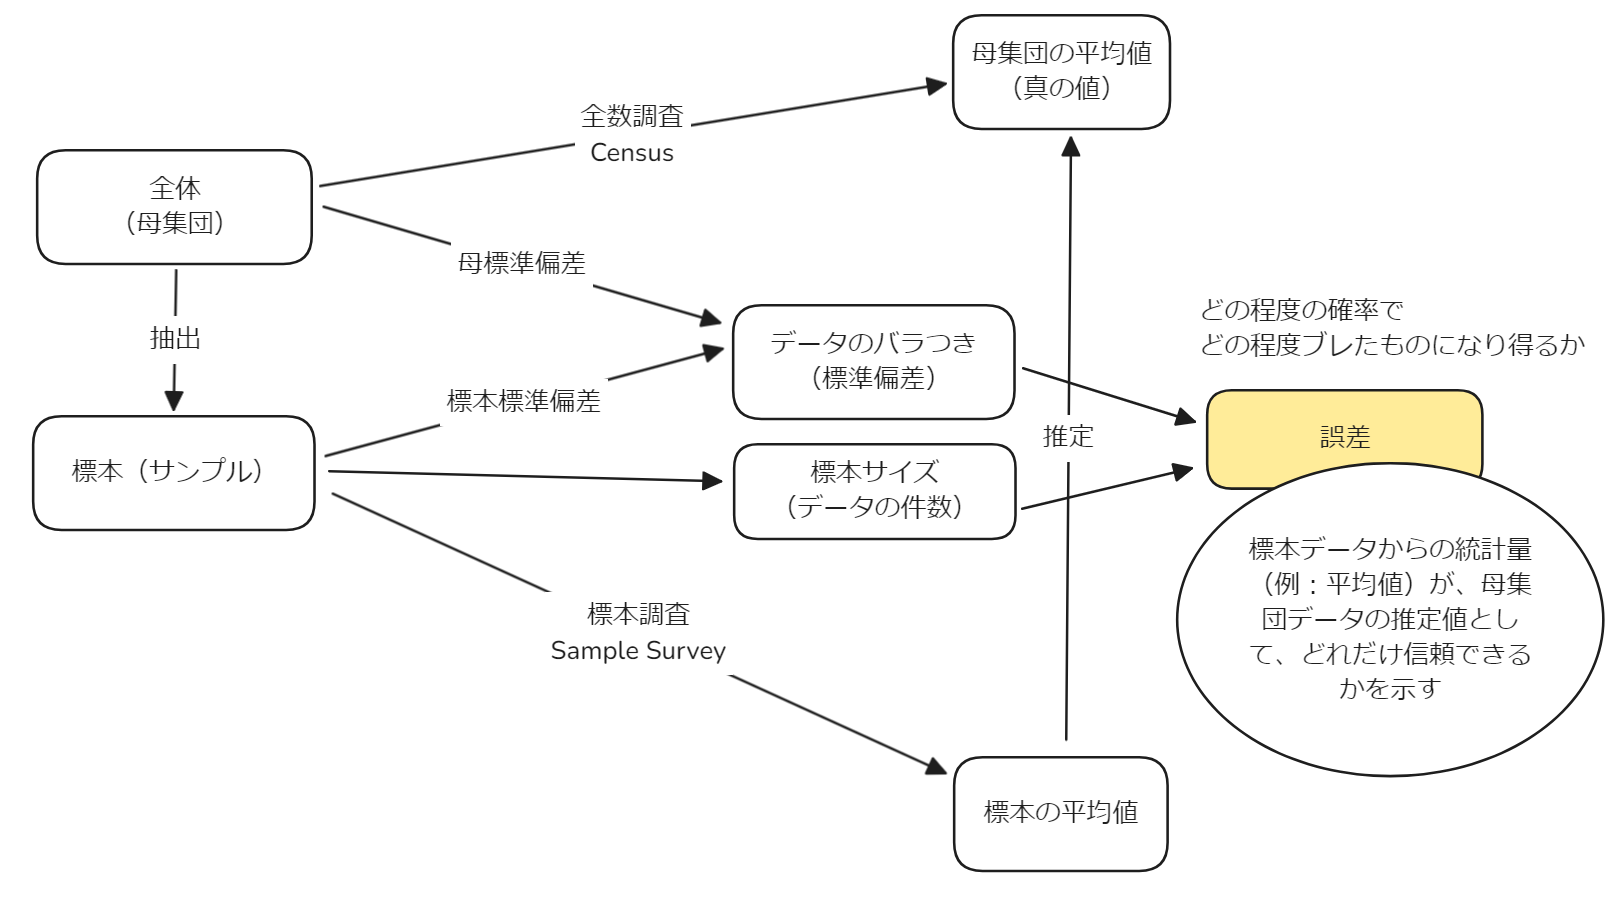

誤差は標本サイズと標準偏差（母標準偏差が無い時は標本標準偏差を使う）の関数として表され、下のような式で求めます。

- 母標準偏差を使う場合： $\frac{\sigma}{\sqrt{n}}$
- 標本標準偏差を使う場合： $\frac s{\sqrt{n}}$

いずれの場合も「標準偏差」を「標本サイズ $n$」の平方根で割ります。これはつまり「誤差」は「標本サイズの平方根に反比例する」ことを表します。つまり

- 標本サイズが大きいほど、誤差が小さくなる
- 標本サイズが小さいほど、誤差が大きくなる

これは、例えば「５人の男性の身長の平均値をもって、男子全員の平均値とするには無理がある、なぜならたまたまその５人が背が低い（高い）人ばかりだったの可能性があるから」という直感に近いでしょう。

以下は標本サイズが増えれば増えるほど、標準誤差（ここでは母標準偏差を使う場合の標準誤差）が小さくなる様子を示すアニメーションです。

<img src="img/standard_error1.gif" alt="Description of GIF" style="width:800px;"/>

#### アニメーションのコード

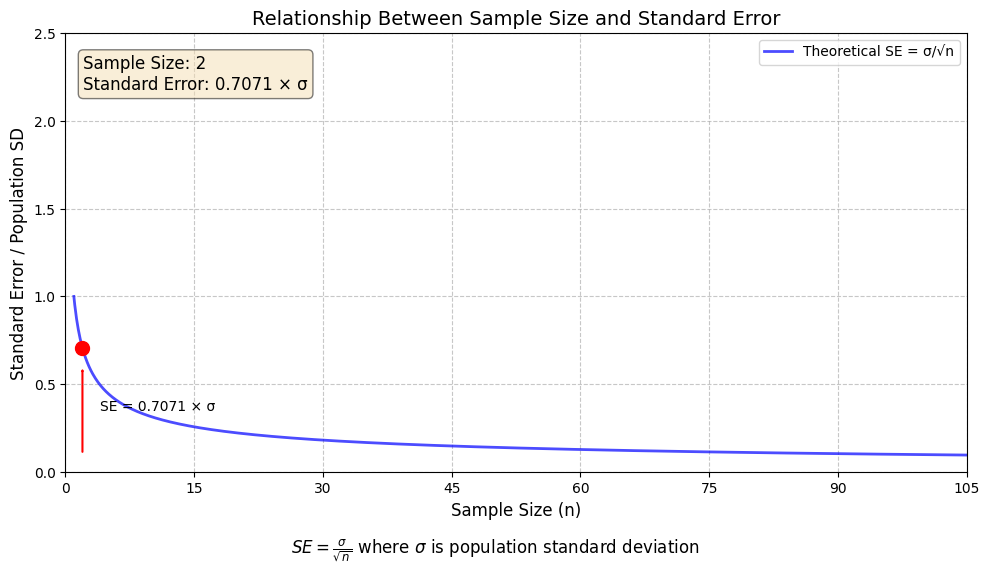

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import MaxNLocator

# 設定パラメータ
np.random.seed(42)  # 再現性のため
population_mean = 50
population_std = 10
max_sample_size = 100
y_min, y_max = 0, 2.5  # Yの範囲（標準誤差/標準偏差の比率）

# 理論的な標準誤差の計算関数
def theoretical_standard_error(sample_size, population_std):
    return population_std / np.sqrt(sample_size)

# アニメーションのフレーム数
n_frames = 120
sample_sizes = np.linspace(2, max_sample_size, n_frames).astype(int)

# 図の初期化
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.15)

# x軸とy軸の範囲を設定
ax.set_xlim(0, max_sample_size + 5)
ax.set_ylim(y_min, y_max)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# 軸ラベルとタイトル
ax.set_xlabel('Sample Size (n)', fontsize=12)
ax.set_ylabel('Standard Error / Population SD', fontsize=12)
ax.set_title('Relationship Between Sample Size and Standard Error', fontsize=14)

# 理論曲線の計算（SE = σ/√n）
x_curve = np.linspace(1, max_sample_size + 5, 1000)
y_curve = 1 / np.sqrt(x_curve)  # 標準化された標準誤差（SE/σ）

# 理論曲線のプロット
curve_line, = ax.plot(x_curve, y_curve, 'b-', lw=2, alpha=0.7, label='Theoretical SE = σ/√n')

# 移動する赤い点の初期化
red_point, = ax.plot([], [], 'ro', ms=10)

# テキストボックスの初期化
info_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# グリッド線の追加
ax.grid(True, linestyle='--', alpha=0.7)

# 注釈用の矢印
arrow = FancyArrowPatch((0, 0), (0, 0), color='red', arrowstyle='->', lw=1.5)
ax.add_patch(arrow)
arrow_text = ax.text(0, 0, '', fontsize=10)

# レジェンド
ax.legend(loc='upper right')

# アニメーション更新関数
def update(frame):
    sample_size = sample_sizes[frame]
    
    # 標準化された標準誤差（SE/σ）
    standard_error_ratio = 1 / np.sqrt(sample_size)
    
    # 赤い点の位置を更新
    red_point.set_data([sample_size], [standard_error_ratio])
    
    # 情報テキストを更新
    info_text.set_text(f'Sample Size: {sample_size}\nStandard Error: {standard_error_ratio:.4f} × σ')
    
    # 矢印の位置を更新
    arrow_start = (sample_size, y_min + 0.1)
    arrow_end = (sample_size, standard_error_ratio - 0.1)
    arrow.set_positions(arrow_start, arrow_end)
    
    # 矢印テキストの位置を更新
    arrow_text.set_position((sample_size + 2, (arrow_start[1] + arrow_end[1]) / 2))
    arrow_text.set_text(f'SE = {standard_error_ratio:.4f} × σ')
    
    return red_point, info_text, arrow, arrow_text

# アニメーションを作成
ani = animation.FuncAnimation(fig, update, frames=n_frames, 
                              interval=100, blit=True)

# 数式による説明を追加
formula_text = r'$SE = \frac{\sigma}{\sqrt{n}}$ where $\sigma$ is population standard deviation'
plt.figtext(0.5, 0.02, formula_text, ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# アニメーションをGIFとして保存する場合
ani.save('standard_error1.gif', writer='pillow', fps=10)